In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 

from antarctic_plots import utils
import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
%load_ext snakeviz

#  Setup inversion and layers

inner region is 200 x 200 km
filtering and resampling ice from 1000m to 10000m
filtering and resampling water from 1000m to 10000m
filtering and resampling bathymetry from 1000m to 10000m
ice: 3600 points, elevations:3700m to 0m
water: 3600 points, elevations:3698m to -1045m
bathymetry: 3600 points, elevations:3698m to -1045m
gravity: 400 points
gravity avg. elevation: 1000
bathymetry control points:8287288


,x,y,Gobs,z
0,-175000.0,-825000.0,-1.631883,1000.0
1,-165000.0,-825000.0,-3.652909,1000.0
2,-155000.0,-825000.0,-8.484632,1000.0
3,-145000.0,-825000.0,-9.352474,1000.0
4,-135000.0,-825000.0,-8.305755,1000.0
...,...,...,...,...
395,-25000.0,-1015000.0,3.752077,1000.0
396,-15000.0,-1015000.0,7.679894,1000.0
397,-5000.0,-1015000.0,9.432914,1000.0
398,5000.0,-1015000.0,10.943825,1000.0


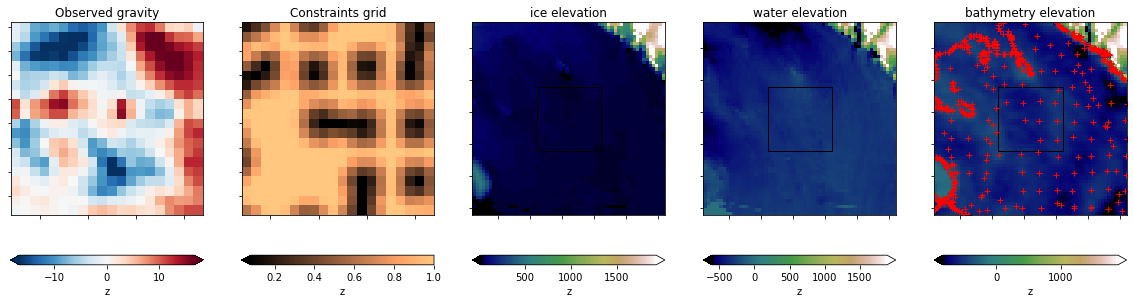

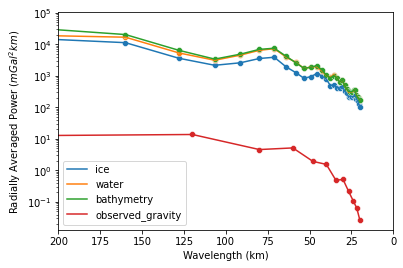

In [32]:
# starting inversion region is 1,000km x 1,000km, choose whether to zoom in, shift the 
# region to the North or West, or change the width of the buffer zone. 
inv_reg, buffer_reg, inv_proj = utils.alter_region(
    starting_region = [-580000, 420000, -1420000, -420000],
    zoom = 400e3,
    n_shift = 0,
    w_shift = 0,#100e3,
    buffer = 200e3,
    )

returned = inv.import_layers(
    layers_list = [
        'ice',
        'water',
        'bathymetry',
        # 'basement',
        # 'moho',
        ], 
    spacing_list = [
        10e3,
        10e3,
        10e3,
        # 10e3,
        # 20e3,
        ], 
    rho_list = [
        920, #890 to 917 from Muto et al. 2013
        1030, #from Muto et al. 2013
        2300,
        # 2670,
        # 3300,
        ],
    fname_list = [
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc',
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc',
        ],
    grav_spacing = 10e3, 
    active_layer='bathymetry',
    buffer_region = buffer_reg,
    inversion_region = inv_reg,

    # Choose between grid and csv, similar comp. times
    # grav_file='gravity_data/rosetta_eq_source_up_continued_Gobs.nc',
    grav_file='gravity_data/rosetta_eq_source_up_continued.csv',
    # grav_file = 'gravity_data/ant4d_gravity_epsg_5k.nc',

    constraints=True,
    constraints_file='constraints_grid/constraints_grid.nc',
    constraints_points='bathymetry_data/bedmachine_RIGGS.csv',
    
    plot=True,
    plot_region=buffer_reg,
    power_spectrum=True,
    )
layers, grav, grav_spacing, constraints_grid, constraints_df, constraints_RIS_df = returned
grav

# Make prism layers

bathymetry top: -500m and bottom: -1045m
water top: -284m andbottom: -500m
ice top: 113m andbottom: -284m


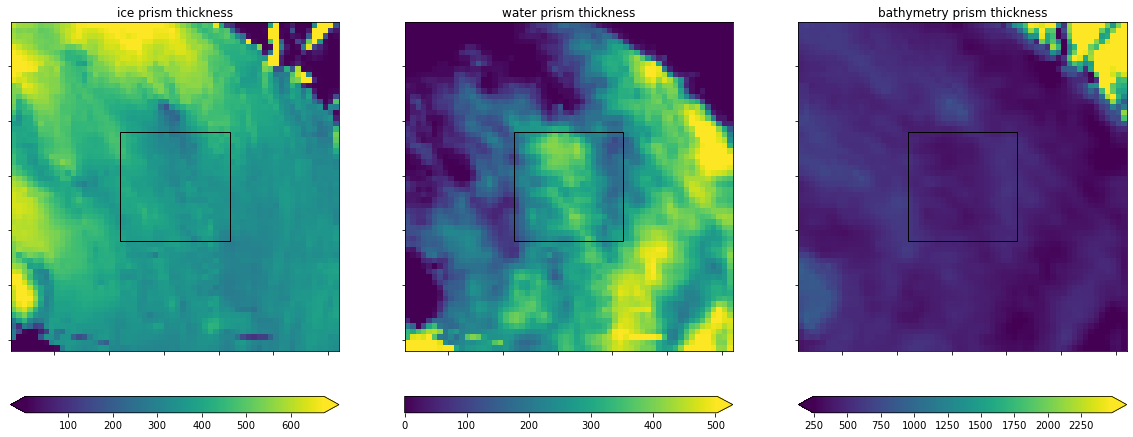

In [33]:
inv.grids_to_prism_layers(
    layers, 
    plot=True, 
    # plot_region=inv_reg,
    plot_type='2D', 
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

# Forward gravity

using supplied DataFrame for observation points
finished ice layer
finished water layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,400.000000,4.000000e+02,4.000000e+02,400.0,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-80000.000000,-9.200750e+05,-7.105427e-17,1000.0,3.552714e-17,-1.119105e-15,-5.293543e-15,-6.412648e-15
std,57718.203172,5.776915e+04,8.100004e+00,0.0,1.236863e+00,3.020404e+00,5.394224e+00,2.975737e+00
min,-175000.000000,-1.015000e+06,-1.963199e+01,1000.0,-3.246060e+00,-6.957695e+00,-1.052922e+01,-5.806832e+00
25%,-127500.000000,-9.675000e+05,-5.237426e+00,1000.0,-8.031668e-01,-2.255495e+00,-4.230918e+00,-2.332287e+00
50%,-80000.000000,-9.200000e+05,-5.055386e-01,1000.0,-3.813396e-02,-1.678511e-01,-6.028470e-01,-3.362453e-01
75%,-32500.000000,-8.725000e+05,5.069884e+00,1000.0,7.485285e-01,2.328994e+00,3.972615e+00,2.185876e+00
max,15000.000000,-8.250000e+05,1.839877e+01,1000.0,3.519234e+00,6.080185e+00,1.282082e+01,7.061249e+00


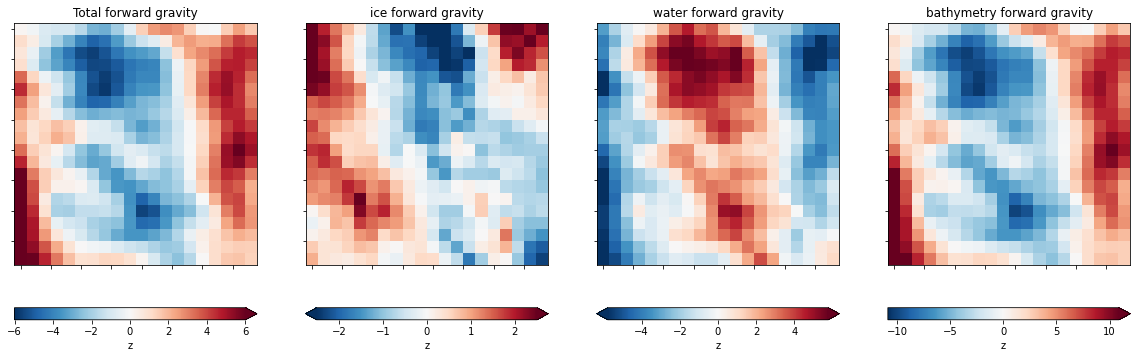

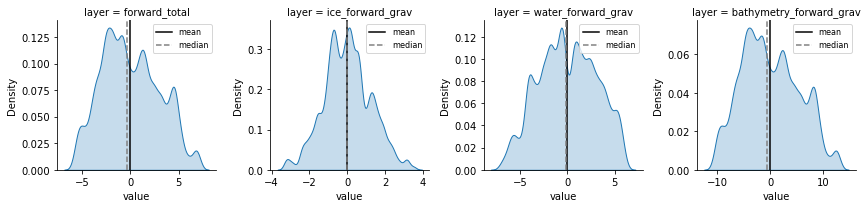

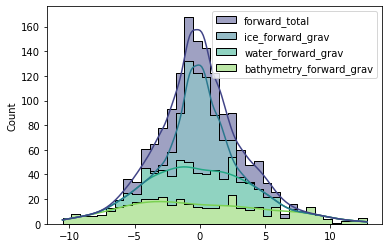

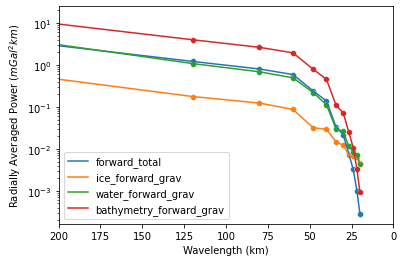

In [34]:
# use below calc at full grid extent, not just grav observation points
# grav = utils.make_grid(inv_reg, grav_spacing, 1000, "z")

df_forward = inv.forward_grav_layers(
    layers, 
    grav,  
    plot=True,
    grav_spacing=grav_spacing,
    inversion_region = inv_reg,
    # exclude_layers=['ice'],
    plot_dists=True,
    power_spectrum=True,
    )
df_forward.describe()

# Anomalies

Root mean squared residual: 4.85mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,400.000000,4.000000e+02,4.000000e+02,400.0,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-80000.000000,-9.200750e+05,-7.105427e-17,1000.0,3.552714e-17,-1.119105e-15,-5.293543e-15,-6.412648e-15,-1.421085e-16,6.252776e-15,0.035518,-0.035518
std,57718.203172,5.776915e+04,8.100004e+00,0.0,1.236863e+00,3.020404e+00,5.394224e+00,2.975737e+00,8.136312e+00,6.916565e+00,3.472126,4.851288
min,-175000.000000,-1.015000e+06,-1.963199e+01,1000.0,-3.246060e+00,-6.957695e+00,-1.052922e+01,-5.806832e+00,-1.883169e+01,-1.586500e+01,-8.779663,-12.020159
25%,-127500.000000,-9.675000e+05,-5.237426e+00,1000.0,-8.031668e-01,-2.255495e+00,-4.230918e+00,-2.332287e+00,-5.026633e+00,-5.156990e+00,-2.017424,-3.507007
50%,-80000.000000,-9.200000e+05,-5.055386e-01,1000.0,-3.813396e-02,-1.678511e-01,-6.028470e-01,-3.362453e-01,-3.012175e-01,-7.114612e-02,-0.048622,-0.047538
75%,-32500.000000,-8.725000e+05,5.069884e+00,1000.0,7.485285e-01,2.328994e+00,3.972615e+00,2.185876e+00,5.480756e+00,5.149806e+00,2.379293,3.265039
max,15000.000000,-8.250000e+05,1.839877e+01,1000.0,3.519234e+00,6.080185e+00,1.282082e+01,7.061249e+00,1.864827e+01,1.844049e+01,6.942391,16.719400


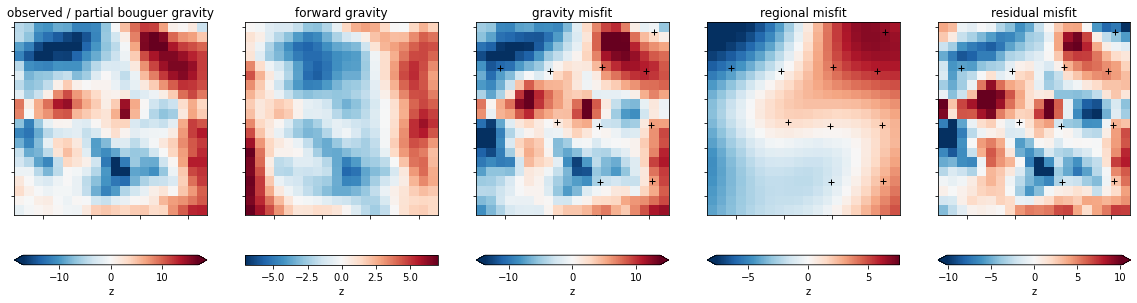

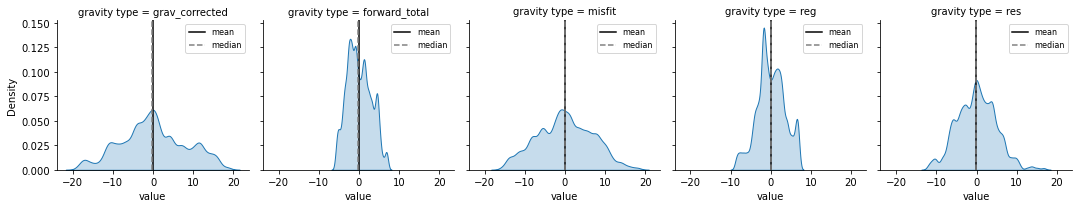

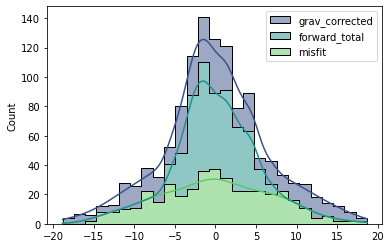

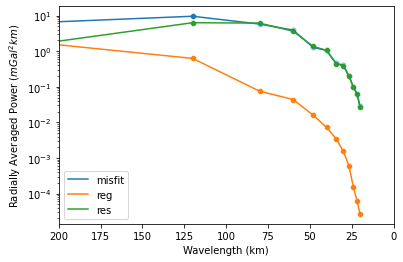

In [8]:
filter='g200e3'
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'filter', 
        filter=filter,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 4.56mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,400.000000,4.000000e+02,4.000000e+02,400.0,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-80000.000000,-9.200750e+05,-7.105427e-17,1000.0,3.552714e-17,-1.119105e-15,-5.293543e-15,-6.412648e-15,-1.421085e-16,6.252776e-15,-0.007079,0.007079
std,57718.203172,5.776915e+04,8.100004e+00,0.0,1.236863e+00,3.020404e+00,5.394224e+00,2.975737e+00,8.136312e+00,6.916565e+00,5.200547,4.562185
min,-175000.000000,-1.015000e+06,-1.963199e+01,1000.0,-3.246060e+00,-6.957695e+00,-1.052922e+01,-5.806832e+00,-1.883169e+01,-1.586500e+01,-13.447919,-12.145145
25%,-127500.000000,-9.675000e+05,-5.237426e+00,1000.0,-8.031668e-01,-2.255495e+00,-4.230918e+00,-2.332287e+00,-5.026633e+00,-5.156990e+00,-3.194888,-2.992621
50%,-80000.000000,-9.200000e+05,-5.055386e-01,1000.0,-3.813396e-02,-1.678511e-01,-6.028470e-01,-3.362453e-01,-3.012175e-01,-7.114612e-02,0.068160,0.085522
75%,-32500.000000,-8.725000e+05,5.069884e+00,1000.0,7.485285e-01,2.328994e+00,3.972615e+00,2.185876e+00,5.480756e+00,5.149806e+00,3.645615,3.034764
max,15000.000000,-8.250000e+05,1.839877e+01,1000.0,3.519234e+00,6.080185e+00,1.282082e+01,7.061249e+00,1.864827e+01,1.844049e+01,23.998806,15.477133


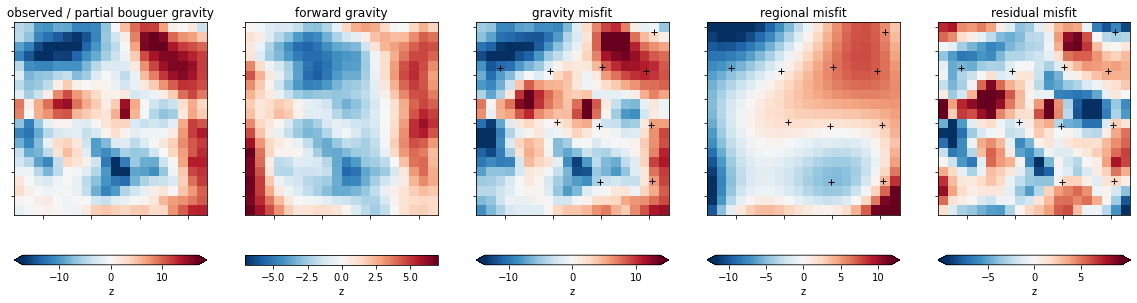

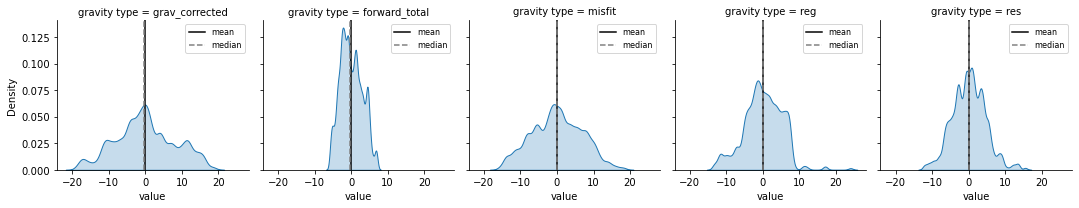

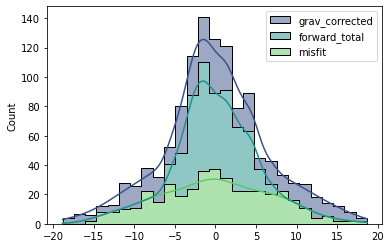

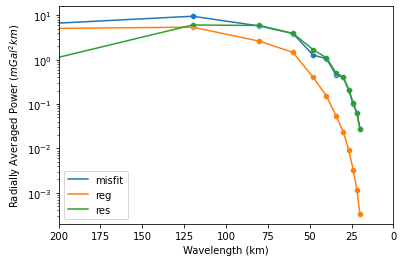

In [28]:
trend=4
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'trend', 
        trend=trend,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 5.64mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,400.000000,4.000000e+02,4.000000e+02,400.0,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-80000.000000,-9.200750e+05,-7.105427e-17,1000.0,3.552714e-17,-1.119105e-15,-5.293543e-15,-6.412648e-15,-1.421085e-16,6.252776e-15,0.211846,-0.211846
std,57718.203172,5.776915e+04,8.100004e+00,0.0,1.236863e+00,3.020404e+00,5.394224e+00,2.975737e+00,8.136312e+00,6.916565e+00,5.279980,5.647889
min,-175000.000000,-1.015000e+06,-1.963199e+01,1000.0,-3.246060e+00,-6.957695e+00,-1.052922e+01,-5.806832e+00,-1.883169e+01,-1.586500e+01,-18.739466,-15.841454
25%,-127500.000000,-9.675000e+05,-5.237426e+00,1000.0,-8.031668e-01,-2.255495e+00,-4.230918e+00,-2.332287e+00,-5.026633e+00,-5.156990e+00,-2.516527,-3.661478
50%,-80000.000000,-9.200000e+05,-5.055386e-01,1000.0,-3.813396e-02,-1.678511e-01,-6.028470e-01,-3.362453e-01,-3.012175e-01,-7.114612e-02,0.436125,-0.048970
75%,-32500.000000,-8.725000e+05,5.069884e+00,1000.0,7.485285e-01,2.328994e+00,3.972615e+00,2.185876e+00,5.480756e+00,5.149806e+00,3.417702,3.034137
max,15000.000000,-8.250000e+05,1.839877e+01,1000.0,3.519234e+00,6.080185e+00,1.282082e+01,7.061249e+00,1.864827e+01,1.844049e+01,10.956764,18.199390


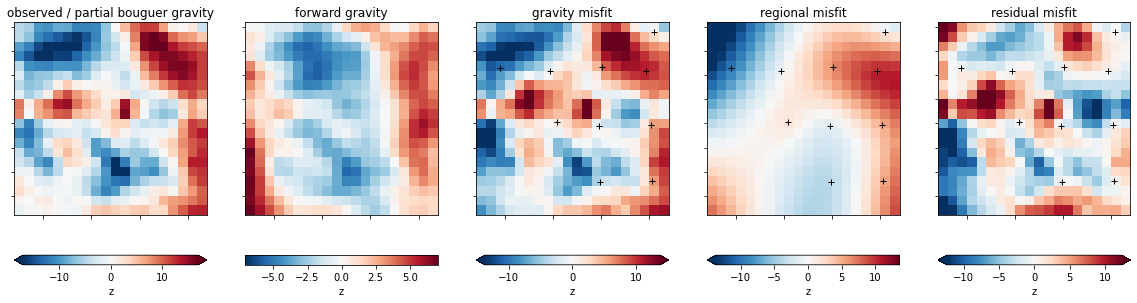

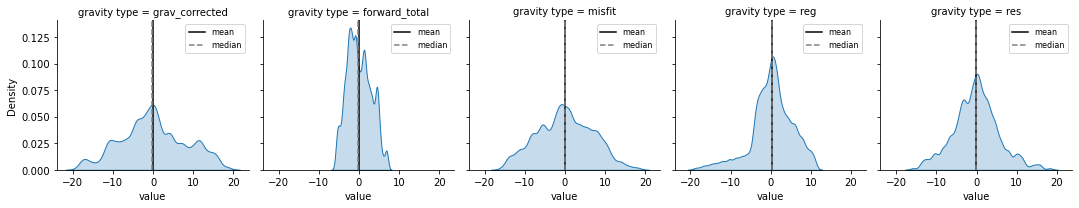

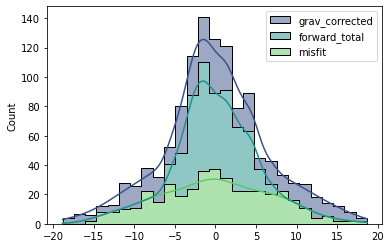

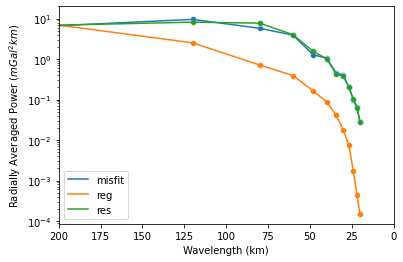

In [41]:
df_anomalies = inv.anomalies(
        layers, 
        df_forward, 
        grav_spacing, 
        'constraints', 
        constraints=constraints_df,
        constraints2plot=constraints_RIS_df,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

# Geo inversion

##################################
iteration 1
initial RMS residual = 5.64mGal


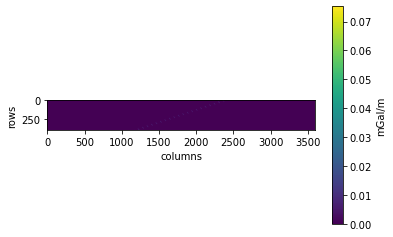

RMS layer correction 18.81m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 2.98mGal
##################################
iteration 2
initial RMS residual = 2.98mGal


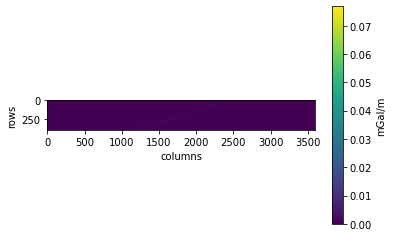

RMS layer correction 12.0m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 1.41mGal
##################################
iteration 3
initial RMS residual = 1.41mGal


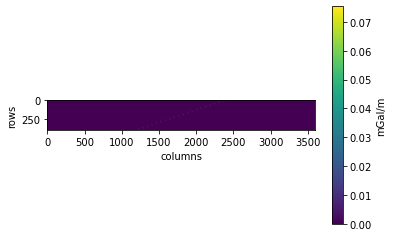

RMS layer correction 6.01m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 0.69mGal
Inversion terminated after 3 iterations with least-squares norm=0 because maximum number of iterations (3) reached


In [42]:
# %%snakeviz --new-tab
regional_method='trend'

iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    layers=layers, 
    input_grav=df_anomalies, 
    regional_method = regional_method,
    Max_Iterations=3,
    deriv_type='prisms',
    solver_type='least squares',
    max_layer_change_per_iter=100,

    apply_constraints = False,
    constraints_grid=constraints_grid,
    exclude_layers=['ice'],

    # filter=filter, 
    trend=trend,
    # constraints=constraints_df,

    inversion_region = inv_reg,
    buffer_region=buffer_reg,
    grav_spacing = grav_spacing,
    ) 

notify
# 17 secs for least squares

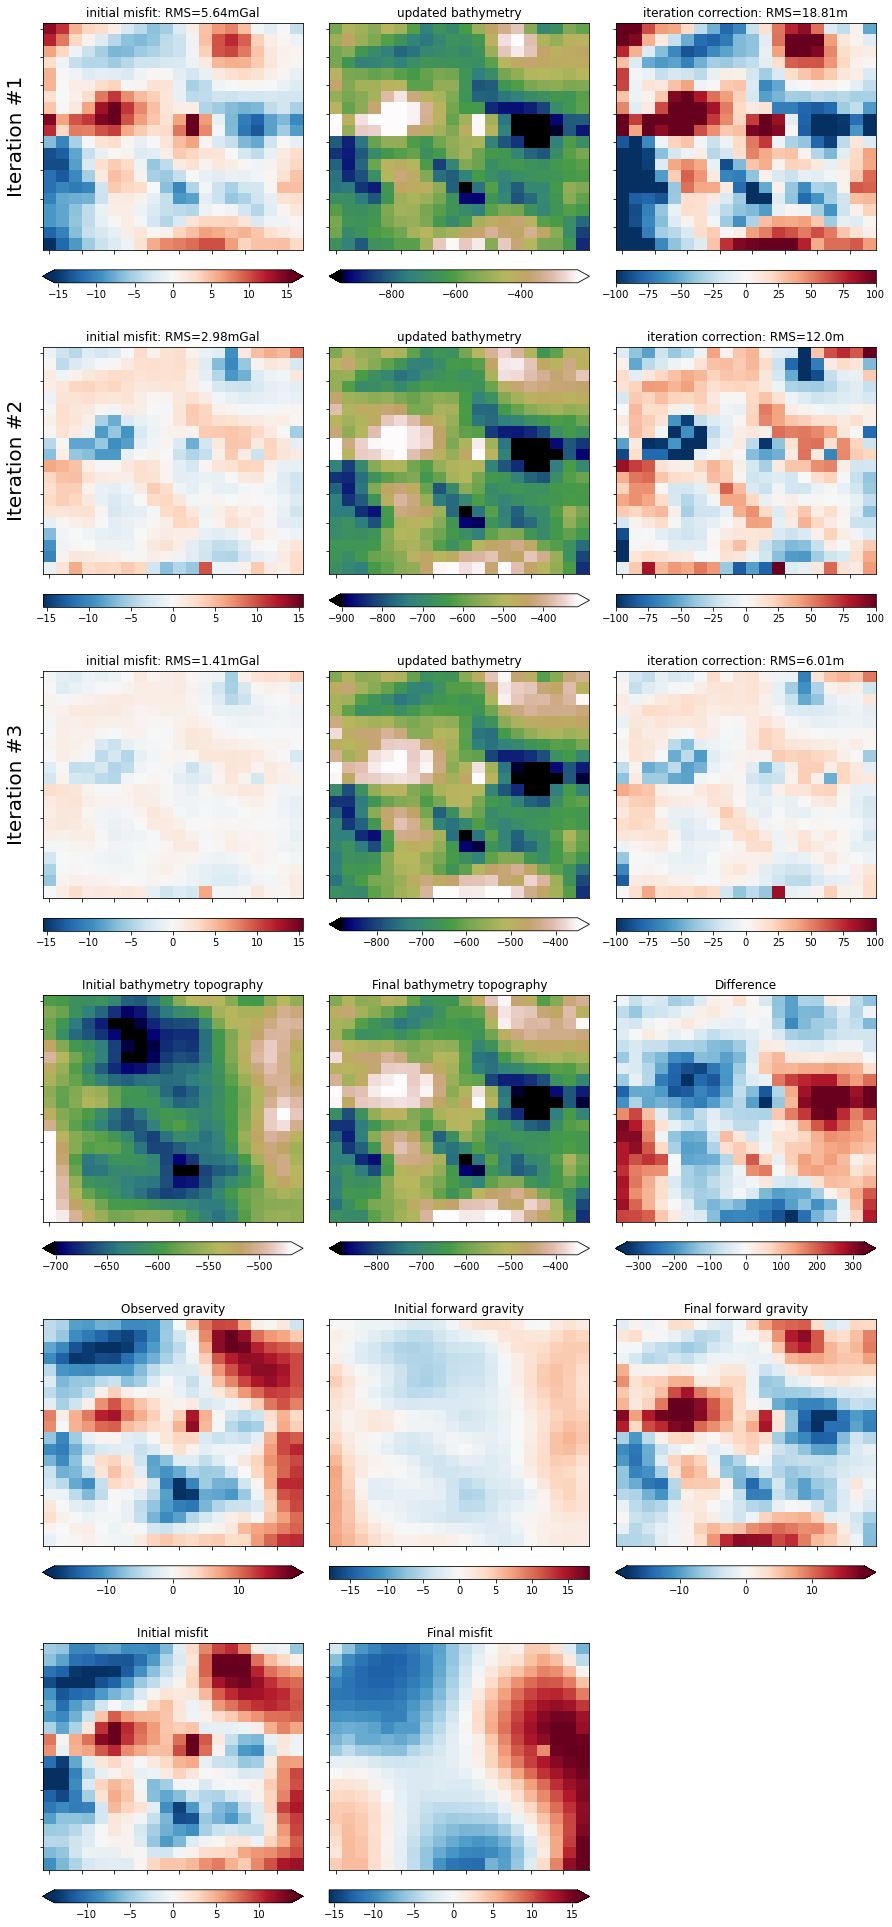

In [43]:
inv.plot_inversion_results(
    df_inversion,
    'bathymetry',
    grav_spacing,
    'epsg:3031',
    layers,
    iter_corrections,
    inversion_region = inv_reg,
    # plot_region = buffer_reg,
    plot_constraints = False,
    # constraints = constraints_RIS_df,
)

# Density inversion

In [ ]:
# density_inversion(
    # density_layer='bathymetry', 
    # plot=True
    # ) 
#10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify